In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)

In [165]:
faces = fetch_olivetti_faces()

X = faces.data
y = faces.target

print("Shape of Data:", X.shape)
print("Number of Classes:", len(np.unique(y)))

Shape of Data: (400, 4096)
Number of Classes: 40


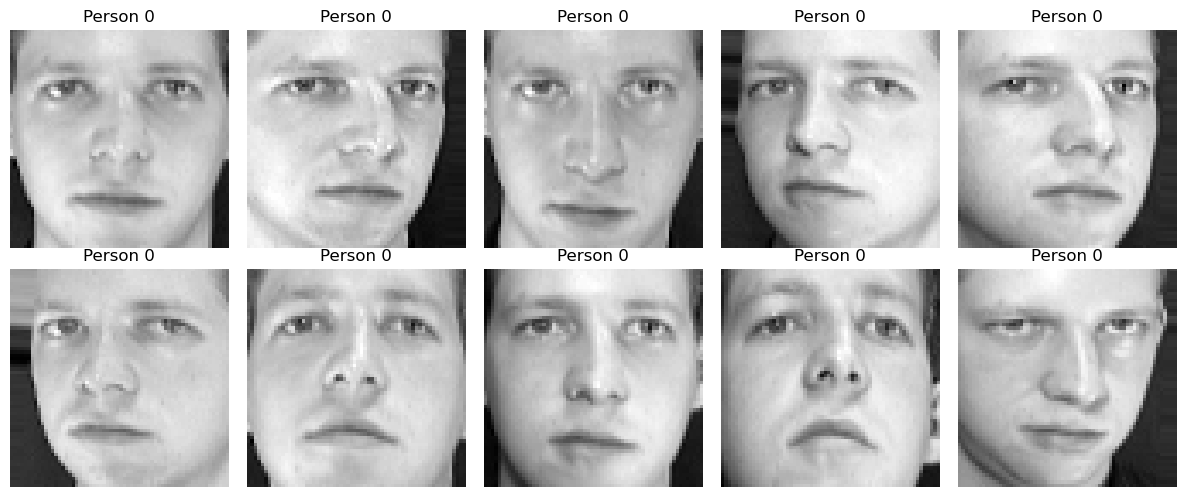

In [166]:
fig, axes = plt.subplots(2, 5, figsize=(12,5))

for ax, img, label in zip(axes.ravel(), faces.images, y):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Person {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [168]:
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=150, whiten=True, random_state=42)),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(256,128),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    ))
])

In [169]:
mlp_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('pca', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",150
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",True
,"svd_solver svd_solver: {'auto', 'f

In [170]:
y_pred_mlp = mlp_pipeline.predict(X_test)

In [171]:
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP F1 Score:", f1_score(y_test, y_pred_mlp, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_mlp))

MLP Accuracy: 0.95
MLP F1 Score: 0.9461904761904762

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         3
          15       1.00      0.50      0.67         2
    

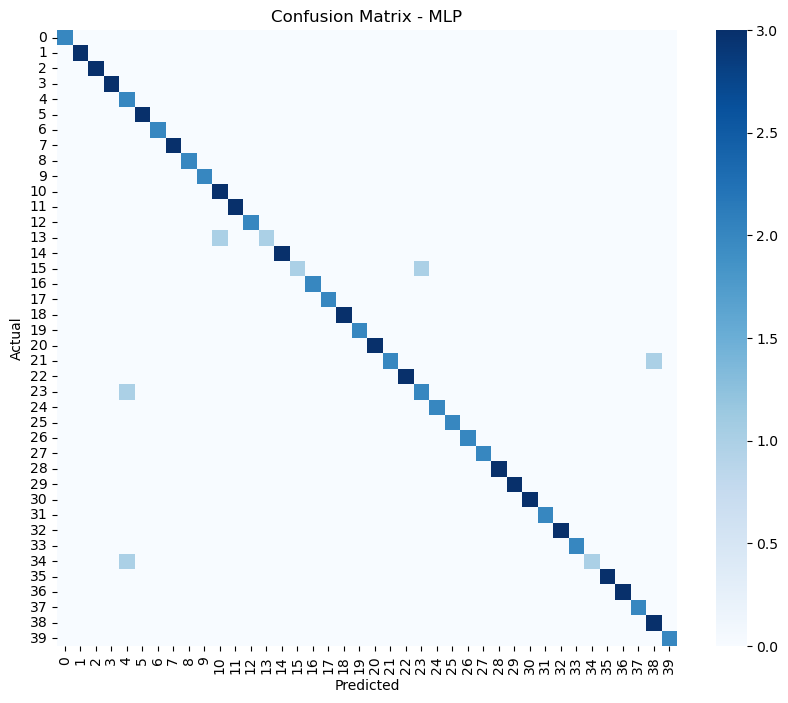

In [172]:
cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues')
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [173]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=150, whiten=True, random_state=42)),
    ('svm', SVC(kernel='rbf', C=10))
])

In [174]:
svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)

In [175]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))

SVM Accuracy: 0.99
SVM F1 Score: 0.9914285714285714


In [176]:
results = {
    "Model": ["MLP", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_mlp),
        accuracy_score(y_test, y_pred_svm)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_mlp, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro')
    ]
}


results_df = pd.DataFrame(results)
print(results_df)

  Model  Accuracy  F1 Score
0   MLP      0.95  0.946190
1   SVM      0.99  0.991429
